# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
import os
pf.__version__

'0.0.70'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
MasterFolder = r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Raman\Leilani-2018"
DayFolder = os.path.join(MasterFolder, "Leilani_2018FI_Oct722")
if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')
output_path=MasterFolder+'\OUTPUT'

meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())

## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=file_ext, exclude_str=['Ne', 'FG', 'Cap','window','IMG'],
 sort=True)
diad_meta[0]

'LL4-FI1-#1.txt'

## Now get all the important information out of the metadata files

In [5]:
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=prefix_str,
trupower=TruPower)
meta.head()

100%|██████████| 12/12 [00:00<00:00, 100.79it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
9,LL8-245.txt,"October 7, 2022\n",October,7.0,12.034,45.0,3.0,50.0,"['0h', '2m', '17s']",2:05:54 PM\n,50754.0,1324.987
2,LL4-FI1-#2.txt,"October 7, 2022\n",October,7.0,12.035,45.0,5.0,50.0,"['0h', '3m', '46s']",2:15:04 PM\n,51304.0,1324.987
1,LL4-FI1-#2 (1).txt,"October 7, 2022\n",October,7.0,6.033,45.0,5.0,50.0,"['0h', '3m', '46s']",2:24:04 PM\n,51844.0,1324.987
0,LL4-FI1-#1.txt,"October 7, 2022\n",October,7.0,6.027,45.0,5.0,50.0,"['0h', '3m', '46s']",2:33:50 PM\n,52430.0,1324.987
10,LL8-433-FI_12mW.txt,"October 7, 2022\n",October,7.0,11.991,45.0,5.0,50.0,"['0h', '3m', '46s']",3:29:22 PM\n,55762.0,1324.987


In [6]:
meta

,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
9,LL8-245.txt,"October 7, 2022\n",October,7.0,12.034,45.0,3.0,50.0,"['0h', '2m', '17s']",2:05:54 PM\n,50754.0,1324.987
2,LL4-FI1-#2.txt,"October 7, 2022\n",October,7.0,12.035,45.0,5.0,50.0,"['0h', '3m', '46s']",2:15:04 PM\n,51304.0,1324.987
1,LL4-FI1-#2 (1).txt,"October 7, 2022\n",October,7.0,6.033,45.0,5.0,50.0,"['0h', '3m', '46s']",2:24:04 PM\n,51844.0,1324.987
0,LL4-FI1-#1.txt,"October 7, 2022\n",October,7.0,6.027,45.0,5.0,50.0,"['0h', '3m', '46s']",2:33:50 PM\n,52430.0,1324.987
10,LL8-433-FI_12mW.txt,"October 7, 2022\n",October,7.0,11.991,45.0,5.0,50.0,"['0h', '3m', '46s']",3:29:22 PM\n,55762.0,1324.987
11,LL8-433-FI_6mW.txt,"October 7, 2022\n",October,7.0,6.030,45.0,5.0,50.0,"['0h', '3m', '47s']",3:38:52 PM\n,56332.0,1324.987
3,LL7-107-FI#1.txt,"October 7, 2022\n",October,7.0,11.993,45.0,5.0,50.0,"['0h', '3m', '47s']",3:54:03 PM\n,57243.0,1324.987
4,LL7-107-FI#2_12mW1acc.txt,"October 7, 2022\n",October,7.0,11.939,45.0,1.0,50.0,"['0h', '1m', '23s']",4:04:48 PM\n,57888.0,1324.987
5,LL7-107-FI#2_6mW.txt,"October 7, 2022\n",October,7.0,6.029,45.0,5.0,50.0,"['0h', '3m', '46s']",4:06:15 PM\n,57975.0,1324.987
6,LL7-109-FI.txt,"October 7, 2022\n",October,7.0,5.999,45.0,5.0,50.0,"['0h', '3m', '47s']",4:22:46 PM\n,58966.0,1324.987


## Then get a simple file name you can stitch with the spectra

In [7]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'LL8-245'

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
LL4-FI1-#1


In [9]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,LL4-FI1-#1,103.253712,0.009174,1285.320413,0.007912,239.494550,1285.320463,365.099697,0.573366,2.814422,...,October,7.0,6.027,45.0,5.0,50.0,"['0h', '3m', '46s']",2:33:50 PM\n,52430.0,1324.987
1,LL7-109-FI,103.461018,0.029195,1284.822065,0.028420,160.774613,1284.822115,345.599447,0.768485,3.928496,...,October,7.0,5.999,45.0,5.0,50.0,"['0h', '3m', '47s']",4:22:46 PM\n,58966.0,1324.987
2,LL7-FI34,103.257234,0.005029,1285.324771,0.000000,1029.243305,1285.324821,1543.557365,0.551287,11.754289,...,October,7.0,6.021,45.0,5.0,50.0,"['0h', '3m', '47s']",4:38:57 PM\n,59937.0,1324.987
3,LL8-433-FI_12mW,103.170447,0.004502,1285.625904,0.000000,1081.489818,1285.625904,1411.358337,0.480612,16.469935,...,October,7.0,11.991,45.0,5.0,50.0,"['0h', '3m', '46s']",3:29:22 PM\n,55762.0,1324.987
4,LL8-433-FI_6mW,103.155601,0.013062,1285.619212,0.012549,624.181404,1285.619212,863.379757,0.509326,10.409288,...,October,7.0,6.030,45.0,5.0,50.0,"['0h', '3m', '47s']",3:38:52 PM\n,56332.0,1324.987


## If you have secondary phases, now is the time to merge those in

In [10]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=prefix_str, file_ext=file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [11]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

testing


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,LL4-FI1-#1,0.127466,0.005291,0.003639,0.003842,103.071945,0.009184,0.000684,0.009174,6.027,...,45.0,5.0,50.0,"['0h', '3m', '46s']",2:33:50 PM\n,52430.0,52430.0,0.998240,0.998233,0.998246
1,LL7-109-FI,0.212931,0.012212,0.011981,0.002364,103.274795,0.029150,0.000681,0.029195,5.999,...,45.0,5.0,50.0,"['0h', '3m', '47s']",4:22:46 PM\n,58966.0,58966.0,0.998200,0.998193,0.998207
2,LL7-FI34,0.127154,0.004334,0.002008,0.003841,103.071156,0.005068,0.000695,0.005029,6.021,...,45.0,5.0,50.0,"['0h', '3m', '47s']",4:38:57 PM\n,59937.0,59937.0,0.998198,0.998191,0.998205
3,LL8-433-FI_12mW,0.093485,0.004206,0.001800,0.003802,102.986184,0.004542,0.000657,0.004502,11.991,...,45.0,5.0,50.0,"['0h', '3m', '46s']",3:29:22 PM\n,55762.0,55762.0,0.998214,0.998208,0.998220
4,LL8-433-FI_6mW,0.087480,0.006419,0.005173,0.003801,102.971030,0.013055,0.000657,0.013062,6.030,...,45.0,5.0,50.0,"['0h', '3m', '47s']",3:38:52 PM\n,56332.0,56332.0,0.998211,0.998204,0.998217


In [15]:
# This cell saves the merged together dataframe with the folder name and the date you fitted it
from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)

sorted_df.to_excel(name)
sorted_df.to_excel(output_path+'/'+name)

nm=os.path.basename(DayFolder)
sorted_df.to_excel(output_path+'/'+nm+'_FI_fitting_w_sec_phases.xlsx')

Raman_session_October 7, 2022_fitted_2023-08-07.xlsx


## This helps visualize the errors on each spectra 

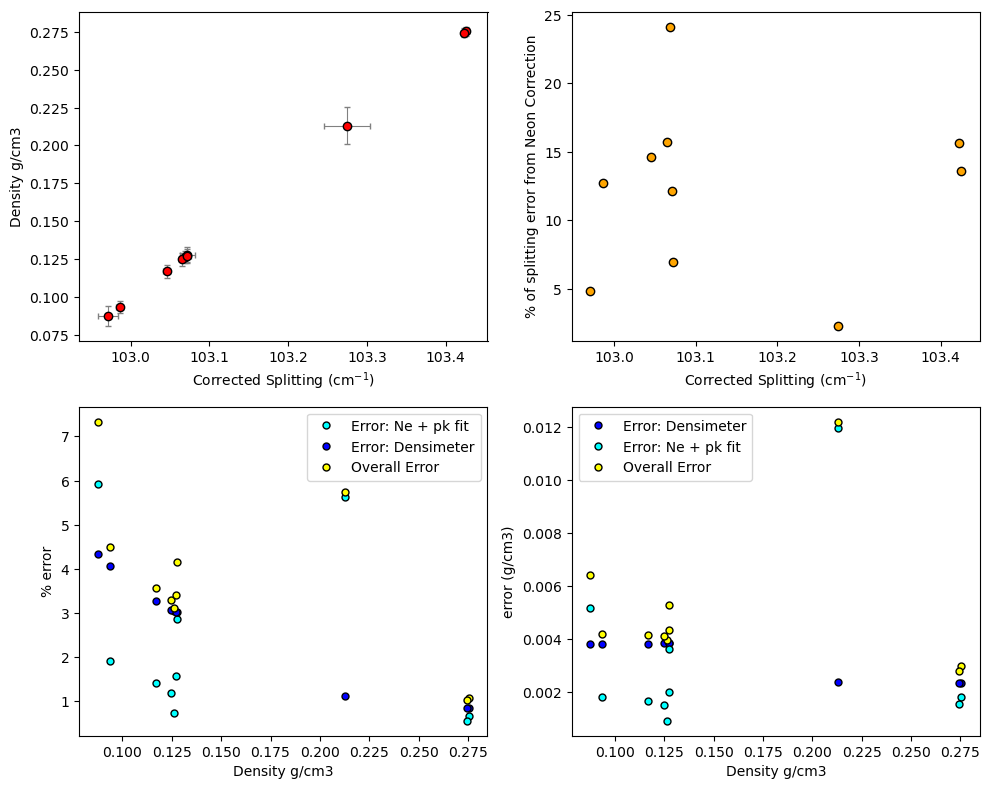

In [13]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## IF FIs
- This calculates an estimated pressure of entrapment based on a temperature you have estimated

Text(0.5, 0, 'Depth (km)')

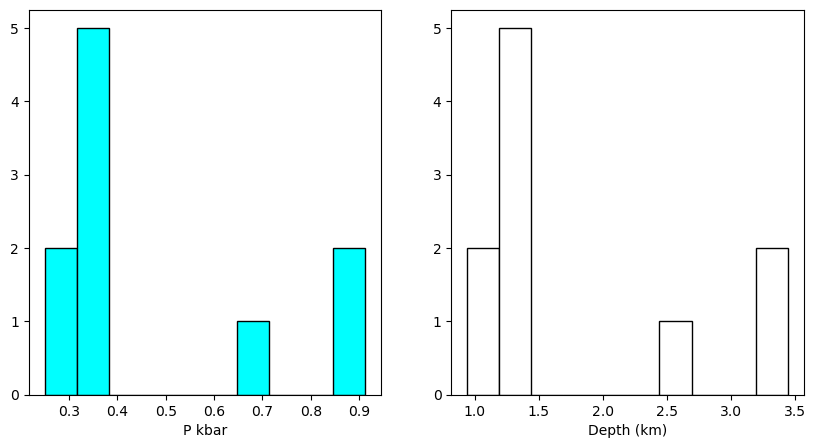

In [14]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2700)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan')
ax2.hist(Depth, ec='k', fc='white')
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')